In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


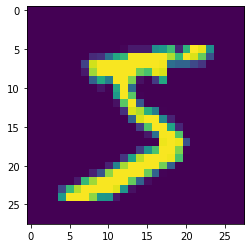

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train[0]

5

**Preprocesing: scaling Images**

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

In [ ]:
mnist = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
mnist.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


In [ ]:
mnist.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4396 - accuracy: 0.8781
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1360 - accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0850 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0475 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0295 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0201 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

In [ ]:
mnist.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9766


[0.07840215414762497, 0.9765999913215637]

In [ ]:
np.argmax(mnist.predict(X_test_scaled)[0])

7

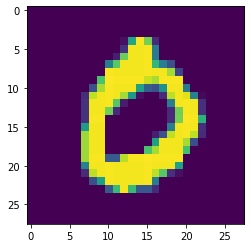

In [ ]:
plt.imshow(X_test[3])

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = mnist.predict(X_test_scaled)
y_pred = [np.argmax(element) for element in y_pred]

In [ ]:
y_pred[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [ ]:
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
#Reshaping X_train and X_test because CNN expect min dimensions = 4
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_train_scaled.shape

(60000, 28, 28, 1)

In [ ]:
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)
X_test_scaled.shape

(10000, 28, 28, 1)

In [ ]:
cnn_mnist = keras.Sequential([
    
    keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
cnn_mnist.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
cnn_mnist.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3049 - accuracy: 0.9102
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0319 - accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0204 - accuracy: 0.9936
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0136 - accuracy: 0.9960


In [ ]:
cnn_mnist.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0464 - accuracy: 0.9855


[0.04644232988357544, 0.9854999780654907]

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
y_pred = mnist.predict(X_test_scaled)
y_pred = [np.argmax(element) for element in y_pred]

In [ ]:
y_pred[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [ ]:
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(33.0, 0.5, 'True')

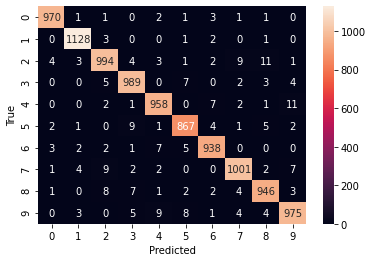

In [ ]:
cm = confusion_matrix(y_test,y_pred)
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')









